In the CliffWalking-v0 environment, if an agent has a 60% chance of successfully taking a safe step each turn (i.e., avoiding the cliff), and the agent must take 10 steps to reach the goal, what is the probability that the agent reaches the goal without falling (i.e., all 10 steps are safe)?

Random variable (X): Number of safe steps taken by the agent.

Distribution: Binomial (since each step is independent and has two outcomes — Safe or Fall).

Parameters:

𝑛
=
10
n=10 (number of steps per episode)

𝑝
=
0.2
p=0.2 (probability of safe step)

Outcome measured: Whether all 10 steps were safe (i.e., 
𝑋
=
10
X=10).

Assumption: Each step’s success is independent and identically distributed.

Trial: One episode (10 steps). Repeat for 100,000 simulated episodes.

In [1]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install ale-py
!pip install autorom[accept-rom-license]

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


 Theoretical Probability of all 10 steps being safe: 0.006047 (0.6047%)
 Empirical Probability (from 100,000 simulated episodes): 0.006290 (0.6290%)


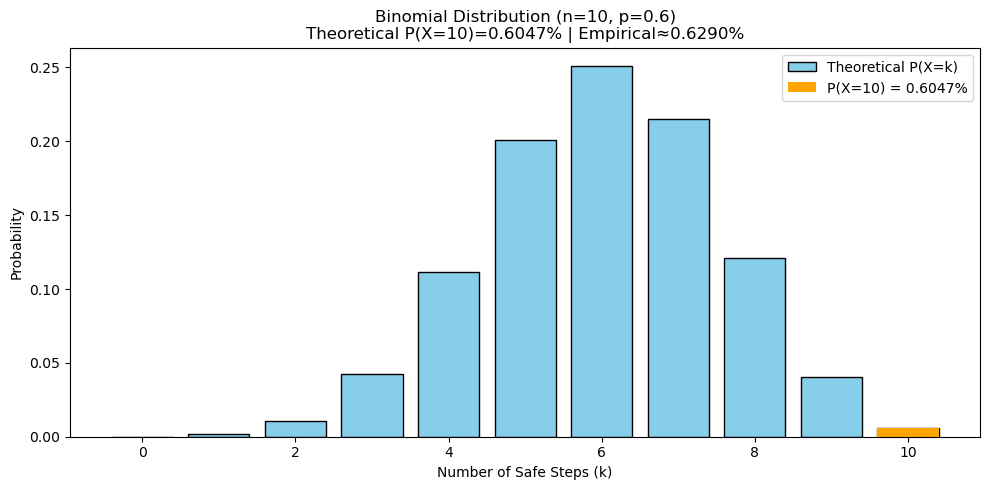

Example path: ['Safe', 'Fall', 'Safe', 'Safe', 'Fall', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe']
Total safe steps: 8 / 10


In [10]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# --- Create CliffWalking environment ---
env = gym.make("CliffWalking-v1")

n = 10          # number of steps required
p = 0.6         # probability of safe step
k = 10          # goal: all steps safe
num_trials = 100_000

probability = math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
print(f" Theoretical Probability of all {n} steps being safe: {probability:.6f} ({probability*100:.4f}%)")

successes = 0
for _ in range(num_trials):
    safe_steps = sum(1 for _ in range(n) if random.random() <= p)
    if safe_steps == k:
        successes += 1
empirical_prob = successes / num_trials
print(f" Empirical Probability (from {num_trials:,} simulated episodes): {empirical_prob:.6f} ({empirical_prob*100:.4f}%)")

x = np.arange(0, n + 1)
y = [math.comb(n, i) * (p ** i) * ((1 - p) ** (n - i)) for i in x]

plt.figure(figsize=(10, 5))
bars = plt.bar(x, y, color="skyblue", edgecolor="black", label="Theoretical P(X=k)")
plt.bar(k, y[k], color="orange", label=f"P(X={k}) = {y[k]*100:.4f}%")
plt.title(
    f"Binomial Distribution (n={n}, p={p})\n"
    f"Theoretical P(X={k})={probability*100:.4f}% | Empirical≈{empirical_prob*100:.4f}%",
    fontsize=12
)
plt.xlabel("Number of Safe Steps (k)")
plt.ylabel("Probability")
plt.legend()
plt.tight_layout()
plt.show()

example_path = ["Safe" if random.random() <= p else "Fall" for _ in range(n)]
print("Example path:", example_path)
print(f"Total safe steps: {example_path.count('Safe')} / {n}")

env.close()


 Theoretical Probability of all 10 steps being safe: 0.006047 (0.6047%)
 Empirical Probability (from 100,000 simulated episodes): 0.006290 (0.6290%)
 

This means that after 100,000 trials, there was a 0.6290% chance of the player reaching all 10 steps at a 60% chance of surviving each step. This is not far from the projected 0.6047% theoretical probability.